# Conway's Game of Life



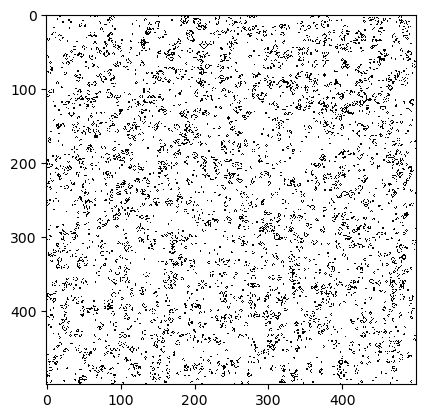

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from scipy.ndimage import convolve


# Define the Game of Life class
class GameOfLife:
    def __init__(self, grid_size=500):
        """
        Initialize the Game of Life grid
        The size of the grid (grid_size x grid_size). From the question (500x500)
        """   
        self.grid_size = grid_size   # Store the grid size as an instance variable

        # Create a 2D NumPy array filled with random 0s (dead cells) and 1s (live cells) 
        self.grid = np.random.choice([0, 1], size=(grid_size, grid_size))  # np.random.choice randomly selects values from [0, 1] for each cell in the grid
        
        # Define a kernel for counting neighbors
        self.kernel = np.array([[1, 1, 1],
                                [1, 0, 1],
                                [1, 1, 1]])


    def update(self):
        """
        Update the grid based on Conway's rules using vectorized operations.
        """
        # Count live neighbors for each cell using convolution
        neighbor_count = convolve(self.grid, self.kernel, mode='constant', cval=0)

        # Apply Conway's rules in a vectorized approach
        self.grid = ((self.grid == 1) & ((neighbor_count == 2) | (neighbor_count == 3))) | \
                    ((self.grid == 0) & (neighbor_count == 3))

        # Convert boolean array back to integers (0 or 1)
        self.grid = self.grid.astype(int)


    def animate(self, generations=100, interval=50, save_as="game_of_life_onan.gif"):
        """
        Create an animation of the Game of Life and save it as a .gif.
        """
        fig, ax = plt.subplots()
        img = ax.imshow(self.grid, cmap='binary', interpolation='nearest')
        ax.axis('on')  

        def update_frame(frame):
            """Update function for each frame."""
            self.update()
            img.set_data(self.grid)
            return [img]

        anim = FuncAnimation(fig, update_frame, frames=generations, interval=interval, blit=True)
        
        # Save animation as a .gif file
        anim.save(save_as, writer=PillowWriter(fps=20))
        plt.show()

# Main execution
if __name__ == "__main__":
    game = GameOfLife(grid_size=500)  # Initialize the game with a 500x500 grid
    game.animate(generations=100, interval=50, save_as="game_of_life_onan.gif")  # Animate and save
    